## Metrics

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import sys
p = os.path.join(os.path.dirname('__file__'), '..')
sys.path.append(p)
from common import *
import sklearn.metrics
from sklearn.metrics import fbeta_score
from sklearn import metrics as scipy_metrics

Classification
* Accuracy
* Precision/Recall
* Confusion Matrix
* ROC Curve

Regression
* Estimators have a score method providing a default evaluation criterion for the problem they are designed to solve
* http://scikit-learn.org/stable/modules/model_evaluation.html

Unsupervised
* Pairwise Distance
* Euclidian Distance
* Jaccardian Distance
* Cosine Similarity
* ??

### Data

In [26]:
pred = np.array([1,0,1,0,1,0,1,0,0])
targ = np.array([1,1,1,0,0,0,1,1,1])

### R^2

In [27]:
# https://en.wikipedia.org/wiki/Coefficient_of_determination
# Variance in the dependent variable predictable from the independent variable(s)
# i.e. how predictive is your independent variable?
# High R^2 = very predictive
# 1 = perfect match
# 0 = model no better than taking the mean of dataset
# <0 = model worse than mean of dataset

# R^2 measures how well a model performs relative to a simple mean of the target values
# What would be our score if we just took the mean of the targets?
# Compares YOUR predictions to a baseline (mean target value -- always guess Blue)

### Basics

In [28]:
def accuracy(preds, targets):
    # How many predicted labels = target labels?
    return sklearn.metrics.accuracy_score(targets.flatten(), preds.flatten())

def recall(preds, targets):
    # Of the positive cases, how many do you catch?
    return sklearn.metrics.recall_score(targets.flatten(), preds.flatten())

def precision(preds, targets):
    # If you guess positive, how often are you right?
    return sklearn.metrics.precision_score(targets.flatten(), preds.flatten())

In [29]:
acc = sklearn.metrics.accuracy_score(targ, pred)
recall = sklearn.metrics.recall_score(targ, pred)
precision = sklearn.metrics.precision_score(targ, pred)

print("Accuracy", acc, "\nRecall", recall, "\nPrecision", precision)

Accuracy 0.5555555555555556 
Recall 0.5 
Precision 0.75


### Covariance

### ROC Curve

* http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py
* http://binf.gmu.edu/mmasso/ROC101.pdf

In [30]:
# restricted to the binary classification task
# or multilabel classification task in label indicator format?

probs = np.array([1,0,1,0,1,0,1,0,0])
targ = np.array([1,1,1,0,0,0,1,1,1])

scipy_metrics.roc_auc_score(targ, probs)

0.5833333333333334

### TP/TN/FP/FN

In [31]:
TP = ((pred == targ) & (pred == 1)).sum()

FP = ((pred != targ) & (pred == 1)).sum()

TN = ((pred == targ) & (pred == 0)).sum()

FN = ((pred != targ) & (pred == 0)).sum()

print(TP, FP, TN, FN)

3 1 2 3


### Confusion Matrix

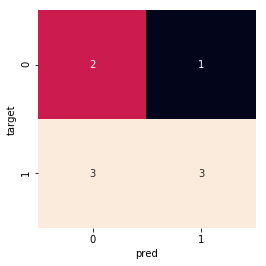

In [32]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(targ, pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)

plt.ylabel('target') # rows
plt.xlabel('pred'); # cols

### Classification Report

In [33]:
# Nice helper function for: Precision, Recall, F1, Support
from sklearn.metrics import classification_report

print(classification_report(targ, pred))

             precision    recall  f1-score   support

          0       0.40      0.67      0.50         3
          1       0.75      0.50      0.60         6

avg / total       0.63      0.56      0.57         9



### F-Score

* Combines Precision / Recall into one useful metric
* F1-Score = weights Precision and Recall equally
* F2-Score = overweights Recall
* Harmonic Mean
    * Averaging Ratios
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html
* https://www.quora.com/What-is-an-intuitive-explanation-of-F-score

In [38]:
# Beta = 1 weights precision/recall equally
f1 = sklearn.metrics.fbeta_score(targ, pred, beta=1, average='binary')

# Beta = 2 overweights recall
f2 = sklearn.metrics.fbeta_score(targ, pred, beta=2, average='binary')

print("F1", f1, "\nF2", round(f2,2))

F1 0.6 
F2 0.54
